# Najbolj priljubljene nenavadne destinacije po svetu

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_rows = 10

%matplotlib inline

priljubljene = pd.read_csv('obdelani-podatki/priljubljene_destinacije.csv', index_col='id')
lokacije = pd.read_csv('obdelani-podatki/lokacije.csv', index_col='lokacija')
glasovi = pd.read_csv('obdelani-podatki/glasovi.csv', index_col='id')
obiskane = pd.read_csv('obdelani-podatki/obiskane_destinacije.csv', index_col='id')

V tej projektni nalogi bomo analizirali 10.000 najbolj priljubjenih nenavadnih destinacij na svetu, kot so objavljene na spletni strani Atlas Obscura. 

Za vsako izmed teh destinacij sem v eni tabeli zbrala ime destinacije, njeno lokacijo, zemljepisno širino in dolžino, kratek opis, povezavo do individualne spletne strani ter uvrstitev na lestvici priljubljenosti. V posebni tabeli sem nato za vsako izmed teh 10.000 destinacij razčlenila njeno lokacijo na mesto in državo, kar je olajšalo nadaljno analizo, v še eno tabelo pa sem zbrala števila obiskovalcev spletne strani Atlas Obscura, ki so posamezno destinacijo bodisi že obiskali bodisi si jo obiskati še želijo. Na koncu sem si ogledala še 10.000 najbolj obiskanih destinacij z namenom primerjave seznamov priljubljenosti in obiskanosti.

### Razvrstitev po priljubljenosti

Oglejmo si najprej podrobneje tabelo, ki vsebuje najbolj priljubljene destinacije, razvrščene po priljubljenosti od 1 do 10.008.

In [13]:
priljubljene

,destinacija,lokacija,sirina,dolzina,opis,url,priljubljenost
id,,,,,,,
1212,City Hall Station,"New York, New York",40.7134,-74.0046,A beautiful and abandoned New York subway stat...,https://www.atlasobscura.com/places/city-hall-...,1
1230,Highgate Cemetery,"London, England",51.5675,-0.1483,London's creepiest cemetery was once the site ...,https://www.atlasobscura.com/places/highgate-c...,2
252,The Wave Organ,"San Francisco, California",37.8085,-122.4401,A huge musical instrument played by the ocean.,https://www.atlasobscura.com/places/wave-organ,3
4334,Underground Tunnels of Los Angeles,"Los Angeles, California",34.0558,-118.2447,"During prohibition, corrupt city officials ran...",https://www.atlasobscura.com/places/undergroun...,4
404,Catacombes de Paris,"Paris, France",48.8343,2.3322,The Catacombs hold secrets much stranger than ...,https://www.atlasobscura.com/places/catacombes...,5
...,...,...,...,...,...,...,...
24951,Expo '92 Grounds,"Seville, Spain",37.4060,-6.0071,An eerie collection of the surviving structure...,https://www.atlasobscura.com/places/expo-92-gr...,10004
24568,Wild Bird Fund,"New York, New York",40.7873,-73.9713,New York City's only wildlife rehabilitation c...,https://www.atlasobscura.com/places/wild-bird-...,10005
19852,Sheldon Peck Homestead,"Lombard, Illinois",41.8891,-88.0092,People escaping slavery passed through the old...,https://www.atlasobscura.com/places/peck-homes...,10006


### Lokacije najbolj priljubljenih destinacij

Najprej nas je zanimalo, na katerih lokacijah se nahaja največ nenavadnih priljubljenih destinacij. Na spodnjem grafu lahko vidimo, da so najbolj skoncentirane v New Yorku, tam jih je kar 279. Sledi London z 260 destinacijami, potem pa opazimo, da izmed prvih desetih kar sedem mest zasedajo lokacije v ZDA. To je po vsej verjetnosti posledica demografske sestave obiskovalcev spletne strani Atlas Obscura, ki je pretežno ameriška.

Text(0.5, 1.0, 'Lokacije najbolj priljubljenih destinacij')

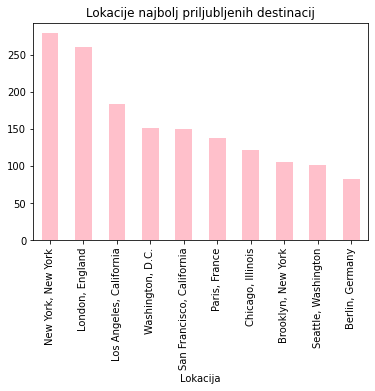

In [14]:
po_lokacijah = priljubljene.groupby('lokacija').size()

prvih_deset_loc = po_lokacijah.sort_values(ascending=False).head(10)

prvih_deset_loc.plot.bar(xlabel = 'Lokacija', color='pink').set_title('Lokacije najbolj priljubljenih destinacij')

Obenem so mesta kot na primer New York, London, Los Angeles in Pariz, če jih naštejemo le nekaj, zelo velika, kar pomeni, da se lahko tam skriva veliko več obskurnih destinacij kot v manjših mestecih - če si spodaj ogledamo še nekaj mest, v katerih se nahaja le ena izmed prvih 10.000 najbolj priljubljenih nenavadnih destinacij, opazimo, da gre res za veliko manj znane in občutno manjše kraje.

In [15]:
po_lokacijah.sort_values(ascending=False).tail(10)

lokacija
Hillsboro, New Mexico           1
Hillsboro, Oregon               1
Hillsborough, California        1
Hillsborough, North Carolina    1
Hinatuan, Philippines           1
Hinckley, Ohio                  1
Hinckley, Utah                  1
Hinsdale, New Hampshire         1
Hinterbrühl, Austria            1
Șinca, Romania                  1
dtype: int64

Poleg samih imen lokacij priljubljenih destinacij pa so v naši tabeli shranjene tudi njihove zemljepisne koordinate - oglejmo si podrobneje še slednje. 

Text(0.5, 1.0, 'Koordinate najbolj priljubljenih destinacij')

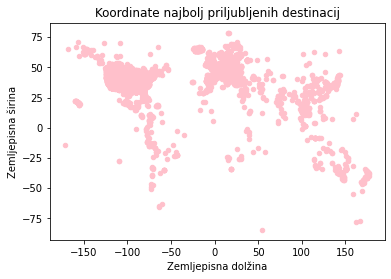

In [16]:
priljubljene.plot.scatter(x='dolzina', y='sirina', color='pink', xlabel='Zemljepisna dolžina', ylabel='Zemljepisna širina').set_title("Koordinate najbolj priljubljenih destinacij")

Na zgornjem grafu, kjer posamezna točka predstavlja lokacijo posamezne nenavadne destinacije (podano z zemljepisnimi koordinatami), je zelo jasno, da se jih večina nahaja v Evropi in Severni Ameriki, bolj poredko so razporejene po Aziji, Avstraliji in Južni Ameriki, v Afriki pa ni skoraj nobene.

### Države najbolj priljubljenih destinacij

Če smo si v prejšnjem razdelku ogledali, na katerih lokacijah (tj. mestih in zemljepisnih koordinatah) se nahaja največ priljubljenih destinacij, nas sedaj zanima še, katere države se pojavijo med prvimi 10.000 najbolj priljubljenimi destinacijami - in koliko različnih mest iz posameznih držav je na tem seznamu izpostavljenih. S tem namenom si oglejmo posebno tabelo, kjer je vsaka unikatna lokacija razdeljena na mesto in državo.

In [17]:
lokacije

,mesto,drzava
lokacija,,
"'s-Hertogenbosch, Netherlands",'s-Hertogenbosch,Netherlands
"A Coruña, Spain",A Coruña,Spain
"Aarhus, Denmark",Aarhus,Denmark
"Aba, China",Aba,China
"Abang, Indonesia",Abang,Indonesia
...,...,...
"Yogyakarta, Indonesia",Yogyakarta,Indonesia
"Zanzibar, Tanzania",Zanzibar,Tanzania
"Zavikon Island, Ontario",Zavikon Island,Canada


Text(0.5, 1.0, 'Države najbolj priljubljenih destinacij')

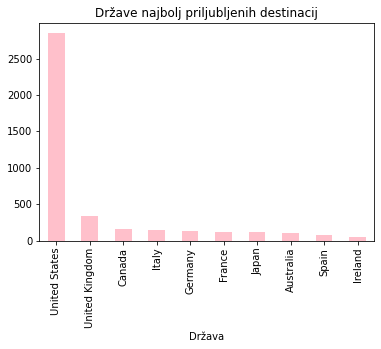

In [18]:
po_drzavah = lokacije.groupby('drzava').size()

prvih_deset = po_drzavah.sort_values(ascending=False).head(10)

prvih_deset.plot.bar(xlabel = 'Država', color='pink').set_title('Države najbolj priljubljenih destinacij')

Tudi brez upoštevanja števila ponovitev pojavitev posameznih lokacij je na podlagi zgornje tabele in grafičnega prikaza jasno, da je daleč največ izpostavljenih destinacij iz ZDA, in sicer kar dobra četrtina, sledita pa ji prav tako angleško govoreče Združeno kraljestvo in Kanada. Vzrok za to lahko zopet najdemo v dejstvu, da gre za ameriško spletno stran, katere obiskovalci skoraj gotovo govorijo angleško.

### Razvrstitev po obiskanosti

Poleg najbolj priljubljenih smo zbrali tudi podatke za 10.000 najbolj *obiskanih* destinacij.

In [19]:
obiskane

,destinacija,lokacija,sirina,dolzina,opis,url,obiskanost
id,,,,,,,
2997,Alcatraz Island,"San Francisco, California",37.8267,-122.4230,"In all of the 29 years it was in operation, no...",https://www.atlasobscura.com/places/alcatraz-i...,1
642,The High Line,"New York, New York",40.7392,-74.0083,Elevated freight railway turned wildly success...,https://www.atlasobscura.com/places/highline,2
8651,Sagrada Família,"Barcelona, Spain",41.4036,2.1744,Construction of Barcelona's iconic (but contro...,https://www.atlasobscura.com/places/sagrada-fa...,3
139,Prague Astronomical Clock,"Prague, Czechia",50.0870,14.4208,Macabre astrological automaton clock dating to...,https://www.atlasobscura.com/places/prague-ast...,4
5074,Faneuil Hall,"Boston, Massachusetts",42.3600,-71.0562,A former waterfront market is now in the cente...,https://www.atlasobscura.com/places/faneuil-hall,5
...,...,...,...,...,...,...,...
16029,Clara Glen Pet Cemetery,"Linwood, New Jersey",39.3319,-74.5829,This quaint New Jersey graveyard is an eternal...,https://www.atlasobscura.com/places/clara-glen...,10004
15575,Gennett Walk of Fame,"Richmond, Indiana",39.8267,-84.9000,This Indiana walk of fame honors music legends...,https://www.atlasobscura.com/places/gennett-wa...,10005
12525,Statue of Michael Jackson,"Manchester, England",53.4859,-2.2422,Fulham F.C. imploded once everyone excised its...,https://www.atlasobscura.com/places/statue-of-...,10006


Če si ogledamo, kje približno se nahajajo slednje, lahko vidimo, da je njihova razporeditev po svetu izrazito podobna razporeditvi najbolj priljubljenih destinacij.

Text(0.5, 1.0, 'Koordinate najbolj obiskanih destinacij')

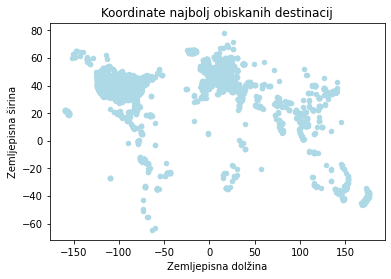

In [20]:
obiskane.plot.scatter(x='dolzina', y='sirina', color='lightblue', xlabel='Zemljepisna dolžina', ylabel='Zemljepisna širina').set_title("Koordinate najbolj obiskanih destinacij")

Vendar pa kljub temu ne gre za povsem enake destinacije.

In [21]:
podtabela_priljubljene = priljubljene[['destinacija', 'priljubljenost']]
podtabela_obiskane = obiskane[['obiskanost']]

priljubljenost_in_obiskanost = pd.merge(pd.merge(podtabela_priljubljene, podtabela_obiskane, on='id', how='left'), glasovi, on='id')

priljubljenost_in_obiskanost.tail(10)

,destinacija,priljubljenost,obiskanost,obiskali,zelijo
id,,,,,
32259,Luna de Xelajú,9999,NaN,39,233
31482,The Labirinto della Masone,10000,NaN,31,234
29538,Rocky Valley Labyrinths,10001,NaN,39,233
27183,Ehrenberg Pioneer Cemetery,10002,NaN,49,233
23255,John Wesley Hardin's Grave,10003,9981.0,83,235
24951,Expo '92 Grounds,10004,6598.0,137,236
24568,Wild Bird Fund,10005,9259.0,89,234
19852,Sheldon Peck Homestead,10006,NaN,76,234
24047,Soviet Dacha,10007,NaN,51,233


In [22]:
priljubljenost_in_obiskanost[priljubljenost_in_obiskanost.obiskanost.isna()].shape[0]

2441

Če vsem destinacijam, ki se nahajajo na seznamu 10.000 najbolj priljubljenih, pridružimo uvrstitev na lestvici obiskanosti in jima dodamo še tabelo z glasovi, opazimo, da kar 2441 izmed najbolj priljubljenih destinacij ni med 10.000 najbolj obiskanimi - oglejmo si, kakšna je splošna medsebojna odvisnost med uvrstitvami na omenjenih seznamih (tukaj bomo opazovali le tiste destinacije, ki se pojavljajo na obeh seznamih, torej izvzemši tistih 2441).

In [36]:
priljubljenost_z_obiskanostjo = pd.merge(pd.merge(podtabela_priljubljene, podtabela_obiskane, on='id'), glasovi, on='id')

priljubljenost_z_obiskanostjo['razmerja'] = priljubljenost_z_obiskanostjo.zelijo / priljubljenost_z_obiskanostjo.obiskali # (obiskali) : (zelijo)

priljubljenost_z_obiskanostjo.head(10)

,destinacija,priljubljenost,obiskanost,obiskali,zelijo,razmerja
id,,,,,,
1212,City Hall Station,1,221,1465,7149,4.879863
1230,Highgate Cemetery,2,90,2129,6691,3.142790
252,The Wave Organ,3,112,2011,6393,3.179015
4334,Underground Tunnels of Los Angeles,4,1094,607,6046,9.960461
404,Catacombes de Paris,5,13,3659,5858,1.600984
17458,Leadenhall Market,6,60,2479,5786,2.334006
166,The Evolution Store,7,137,1823,5767,3.163467
19170,Magowan's Infinite Mirror Maze,8,887,694,5468,7.878963
4335,Secret Tiled Staircase,9,166,1668,5439,3.260791


In [42]:
priljubljenost_z_obiskanostjo[priljubljenost_z_obiskanostjo.razmerja == 1] 

,destinacija,priljubljenost,obiskanost,obiskali,zelijo,razmerja
id,,,,,,
12631,The Oldest Fence in New York,4755,1658,465,465,1.0
15848,Grande Hermine,6500,2316,362,362,1.0
1287,Haw Par Villa,6632,2327,360,360,1.0
20061,Great Blue Hill,8770,3382,270,270,1.0


Izmed 10.000 najbolj priljubljenih imamo tako le 4 destinacije, ki si jih želi obiskati isto število ljudi, kot je destinacijo že obiskalo, na splošno pa so povečini višja števila tistih, ki si nekam želijo iti, v primerjavi s tistimi, ki so tam že bili - kar je tudi smiselno.

Text(0.5, 1.0, 'Razmerja med glasovi glede na uvrstitev na lestvici priljubljenosti')

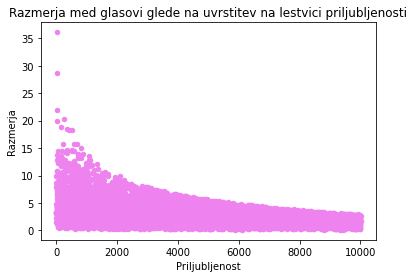

In [55]:
priljubljenost_z_obiskanostjo.plot.scatter(x='priljubljenost', y='razmerja', color='violet', xlabel='Priljubljenost', ylabel='Razmerja').set_title('Razmerja med glasovi glede na uvrstitev na lestvici priljubljenosti')

Na zgornjem grafu, ki prikazuje razmerja med številom tistih, ki so neko destinacijo že obiskali in tistih, ki si to še želijo, lahko vidimo, da imamo pri najbolj priljubljenih destinacijah izrazito več obiskovalcev spletne strani Atlas Obscura, ki si tja želijo iti, kot pa tistih, ki so tam že bili. Ko se približamo sredini lestvice priljubljenosti (od približno 5000. mesta naprej) do tako velikih razlik ne prihaja več in do konca seznama razmerja med obiski in željami po obisku ostajajo nekje med 1:0 in 1:5.

### Tipi najbolj priljubjenih destinacij

Na koncu nas zanima še, ali obstaja kakšen tip destinacije, ki je še posebej priljubljen (npr. muzeji, pokopališča, ruševine...) in se na seznamu pojavlja občutno pogosteje od ostalih. S tem namenom bomo pod drobnogled vzeli sama imena priljubljenih destinacij ter njihove kratke opise.

In [27]:
tipi = priljubljene[['destinacija', 'opis', 'priljubljenost']]

tipi

,destinacija,opis,priljubljenost
id,,,
1212,City Hall Station,A beautiful and abandoned New York subway stat...,1
1230,Highgate Cemetery,London's creepiest cemetery was once the site ...,2
252,The Wave Organ,A huge musical instrument played by the ocean.,3
4334,Underground Tunnels of Los Angeles,"During prohibition, corrupt city officials ran...",4
404,Catacombes de Paris,The Catacombs hold secrets much stranger than ...,5
...,...,...,...
24951,Expo '92 Grounds,An eerie collection of the surviving structure...,10004
24568,Wild Bird Fund,New York City's only wildlife rehabilitation c...,10005
19852,Sheldon Peck Homestead,People escaping slavery passed through the old...,10006


Do posameznih tipov najlažje pridemo, če najprej v imenih, potem pa še v opisih destinacij poiščemo besede, ki se največkrat ponavljajo. Ker je naš cilj poiskati najpogostejše samostalnike in pridevnike, bomo besede s tremi črkami ali manj izpustili (v izogib ponavljajočim se angleškim besedam kot so "a", "the", "and", "is", "was"...).

In [47]:
def loci_besede(niz):
    return pd.Series(
        sorted(
            {beseda for beseda in niz.replace(',', '').replace('.', '').replace('"', '').lower().split() if len(beseda) > 3}
            ), dtype='object')

besede_v_imenih = tipi.destinacija.apply(loci_besede)
besede_v_opisih = tipi.opis.apply(loci_besede)

In [48]:
imena = pd.melt(besede_v_imenih).dropna()
imena = imena.drop(columns='variable')
po_imenih = imena.groupby('value').size().sort_values(ascending=False).head(20)
po_imenih

value
museum      822
house       329
park        303
cemetery    159
castle      149
           ... 
center       92
city         92
monument     90
cave         85
grave        85
Length: 20, dtype: int64

Text(0.5, 1.0, 'Število ponovitev najpogostejših besed v imenih destinacij')

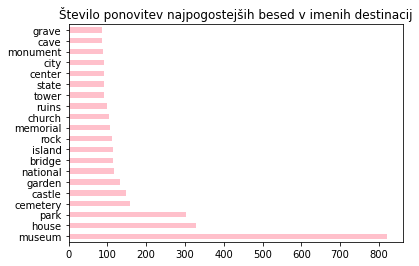

In [50]:
po_imenih.plot.barh(xlabel = '', color='pink').set_title('Število ponovitev najpogostejših besed v imenih destinacij')

Če si najprej ogledamo le ponavljajoče se besede v imenih destinacij, za zgornjem grafu lahko vidimo na primer 20 najpogostejših, je jasno, da se daleč največkrat pojavi beseda "museum", torej muzej, z več kot 800 ponovitvami. Izstopata še hiša in park, obe tipa destinacije se pojavita več kot 300-krat, potem pa med več kot stotimi ponovitvami opazimo tudi pokopališče, grad in vrt, če jih izpostavimo le nekaj.

In [51]:
opisi = pd.melt(besede_v_opisih).dropna()
opisi = opisi.drop(columns='variable')
opisi = opisi[(opisi.value != 'this') & (opisi.value != 'with') & (opisi.value != 'that') & (opisi.value != 'from') & (opisi.value != 'where')]
po_opisih = opisi.groupby('value').size().sort_values(ascending=False).head(20)
po_opisih

value
museum       552
home         433
largest      407
abandoned    396
once         391
            ... 
been         282
only         280
over         276
oldest       270
city         260
Length: 20, dtype: int64

Text(0.5, 1.0, 'Število ponovitev najpogostejših besed v opisih destinacij')

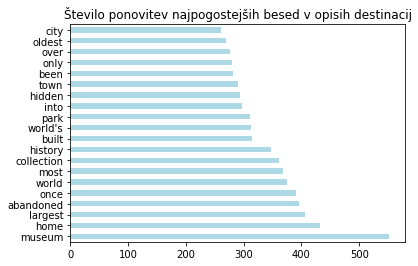

In [52]:
po_opisih.plot.barh(xlabel = '', color='lightblue').set_title('Število ponovitev najpogostejših besed v opisih destinacij')

Vendar včasih tipa posamezne destinacije ne moremo razbrati direktno iz imena, ali pa je njen opis veliko zgovornješi, zato si na zgornjem grafu oglejmo še frekvence besed v opisih priljubljenih destinacij. Najpogosteje se zopet pojavi muzej, vendar pogostost pojavitve letega ne odstopa tako izrazito od naslednjih besed, kot na primer "dom", "največji" in "zapuščen" (prevedeno iz angleščine), ki sledijo.

Text(0.5, 1.0, 'Število ponovitev najpogostejših besed v imenih in opisih destinacij')

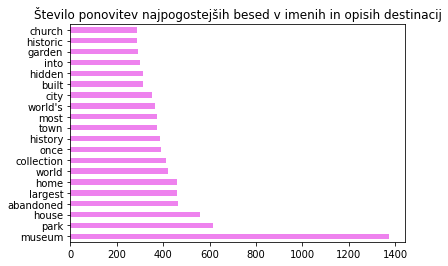

In [56]:
skupaj = pd.concat([imena, opisi])

po_besedah = skupaj.groupby('value').size().sort_values(ascending=False).head(20)

po_besedah.plot.barh(xlabel = '', color='violet').set_title('Število ponovitev najpogostejših besed v imenih in opisih destinacij')

Za konec še združimo število ponovitev besed v imenih in opisih najbolj priljubljenih nenavadnih destinacij. Zelo jasno je, da so še posebej pogosti tipi destinacij muzeji, sledijo jim parki in hiše, frekvence pridevnikov pa nam povedo še, da ljudi izrazito privlačijo destinacije, ki jih lahko opišemo kot zapuščene, največje, skrite in zgodovinske.